# Cross validation

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

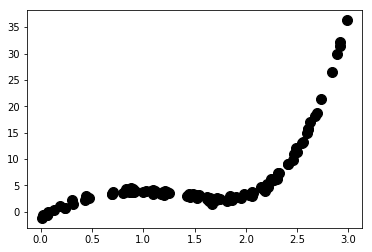

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [3]:
x=np.vstack(x)

# k-fold

In [4]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=3)
kf.get_n_splits(x)

3

In [5]:
scores = list()
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
for train_index, test_index in kf.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scores.append(model2.fit(X_train, y_train).score(X_test, y_test))
    print(model2.fit(X_train, y_train).score(X_test, y_test))
print(scores)

0.6462713025764937
0.6703829027493595
0.7666323787691394
[0.6462713025764937, 0.6703829027493595, 0.7666323787691394]


/usr/local/lib/python2.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [6]:
kfold = KFold(n_splits=3)
[model2.fit(x[train], y[train]).score(x[test], y[test]) for train, test in kfold.split(x)]

[0.6462713025764937, 0.6703829027493595, 0.7666323787691394]

# cross_val_score

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(model2, x, y, cv=kfold)

array([0.6462713 , 0.6703829 , 0.76663238])

In [8]:
cross_val_score(model2, x, y, cv=kfold, scoring='r2')

array([0.6462713 , 0.6703829 , 0.76663238])

In [9]:
cross_val_score(model2, x, y, cv=kfold, scoring='neg_median_absolute_error')

array([-3.50910046, -3.19713657, -3.20281164])

# cross_val_predict

In [10]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(model2, x, y, cv=kfold)

array([ 5.53745847e+00,  1.30227895e+00,  2.51822652e+00,  3.85675961e-01,
        1.77096341e+01,  9.87131859e+00,  3.29844687e+00, -4.06658606e-02,
        4.11588558e-01,  1.72495062e+00, -1.33720468e-02,  1.52808186e+01,
        1.51909753e+00,  2.88508723e+00,  3.68530241e-01,  2.30589647e+01,
        4.60241434e+00,  5.02108214e+00, -1.77084920e-02,  1.09275669e+01,
        9.76819808e+00,  8.38532357e+00,  4.92065378e+00,  4.26642891e+00,
        5.34573555e-02,  1.19907448e+00,  9.33972379e+00,  1.07962932e+01,
        2.64293462e+00,  1.62774680e+01,  1.25819628e+01,  3.48829816e-01,
        1.34741541e+00, -1.33791747e-02,  4.45754224e+00,  6.69440984e+00,
        1.41999308e+01,  3.50580214e+00,  2.64826136e+00,  3.34160749e+00,
        3.26402442e+00,  5.00657415e+00,  1.36644111e+01,  9.15771007e-01,
        4.02578674e+00,  6.20889249e-01,  5.00262519e-01,  7.72548924e+00,
        1.35683712e+01,  4.71871090e-01,  5.43733099e+00,  1.59345805e+01,
        4.34975922e-01,  